## Curva de calibración para la solucion B

### Importar las librerias necesarias


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


### Importar los datos del DataFrame


In [2]:
df = pd.read_csv('../curvaCalibracionB.csv')
df


,CONCENTRACION,ABSORBANCIA
0,0,0.021
1,20,0.027
2,50,0.029
3,100,0.032
4,200,0.037
5,500,0.041
6,1000,0.046


### Declarar los valores que tomaran cada eje


In [3]:
concentration = df['CONCENTRACION'].values.reshape(-1, 1)
absorbance = df[' ABSORBANCIA'].values.reshape(-1, 1)
concentration
absorbance


array([[0.021],
       [0.027],
       [0.029],
       [0.032],
       [0.037],
       [0.041],
       [0.046]])

### Crear la gráfica para los valores reales


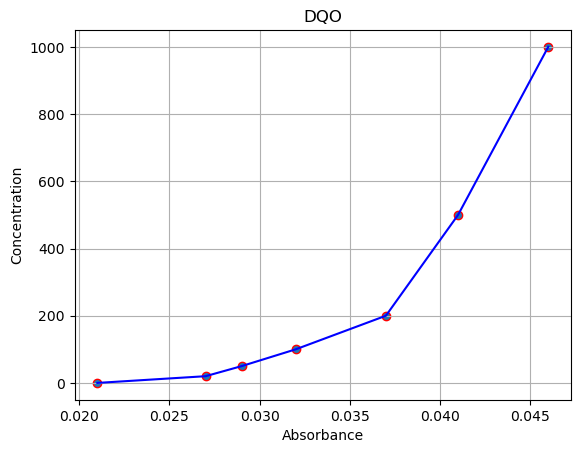

In [4]:
fig = plt.figure()
ax = fig.subplots()
plt.scatter(absorbance, concentration, edgecolors='red')
plt.plot(absorbance, concentration, color='blue')
ax.set_xlabel('Absorbance')
ax.set_ylabel('Concentration')
ax.set_title('DQO')
plt.grid()
plt.show()


### Obtener los valores de la ecuación de la recta mediante la librería **Scikit Learn**


In [5]:
linearRegressor = LinearRegression()
linearRegressor.fit(absorbance, concentration)
concentration_predict = linearRegressor.predict(absorbance)
concentration_predict


array([[-197.49198204],
       [  29.42270686],
       [ 105.0609365 ],
       [ 218.51828095],
       [ 407.61385504],
       [ 558.8903143 ],
       [ 747.98588839]])

### Calcular los valores de la pendiente y el intercepto


In [6]:
m = linearRegressor.coef_[0][0]
c = linearRegressor.intercept_[0]
label = r'$DQO= %0.4fx %+0.4f$' % (m, c)
print(label)


$DQO= 37819.1148x -991.6934$


### Calcular la R²

In [7]:
from sklearn.metrics import r2_score
R2 = r2_score(concentration, concentration_predict)
print(R2)

0.7930486928269561


### Agregar los datos calculados a la grafica anterior


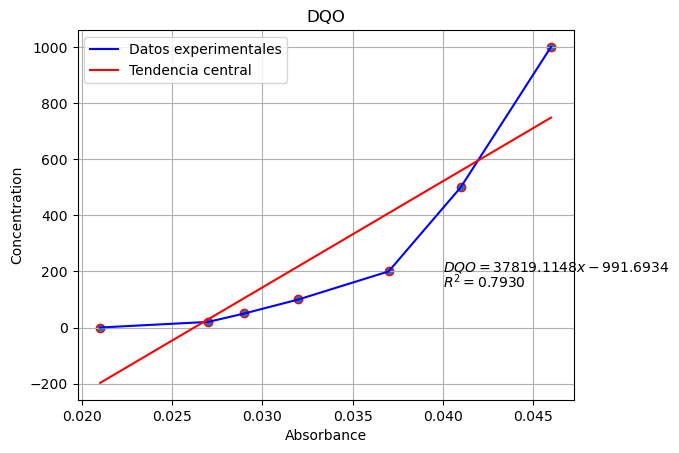

In [8]:
fig = plt.figure()
ax = fig.subplots()
plt.scatter(absorbance, concentration, edgecolors='red')
plt.plot(absorbance, concentration, color='blue', label='Datos experimentales')
plt.plot(absorbance, concentration_predict, color='red', label='Tendencia central')
ax.text(0.04, 140, r'$R^2= %0.4f$' %(R2))
ax.text(0.04, 200, label)
ax.set_xlabel('Absorbance')
ax.set_ylabel('Concentration')
ax.set_title('DQO')
plt.legend()
plt.grid()
plt.show()